## Proje - Müsilaj Tespiti

## Senanur Ağaç - 200102002043

Total Pixels: 841104
White Pixels: 84805
White Pixel Ratio: 10.08%
m1 - Image: m1.jpg, White Pixel Ratio: 10.08%
Total Pixels: 998130
White Pixels: 88200
White Pixel Ratio: 8.84%
m2 - Image: m2.jpg, White Pixel Ratio: 8.84%
Total Pixels: 908323
White Pixels: 8032
White Pixel Ratio: 0.88%
m3 - Image: m3.jpg, White Pixel Ratio: 0.88%
Total Pixels: 390630
White Pixels: 11863
White Pixel Ratio: 3.04%
m4 - Image: m4.jpg, White Pixel Ratio: 3.04%
Total Pixels: 570064
White Pixels: 24265
White Pixel Ratio: 4.26%
m5 - Image: m5.jpg, White Pixel Ratio: 4.26%
Total Pixels: 235200
White Pixels: 105430
White Pixel Ratio: 44.83%
m6 - Image: m6.jpg, White Pixel Ratio: 44.83%
Total Pixels: 648000
White Pixels: 283838
White Pixel Ratio: 43.80%
m7 - Image: m7.jpg, White Pixel Ratio: 43.80%
Total Pixels: 743436
White Pixels: 384643
White Pixel Ratio: 51.74%
m8 - Image: m8.jpg, White Pixel Ratio: 51.74%


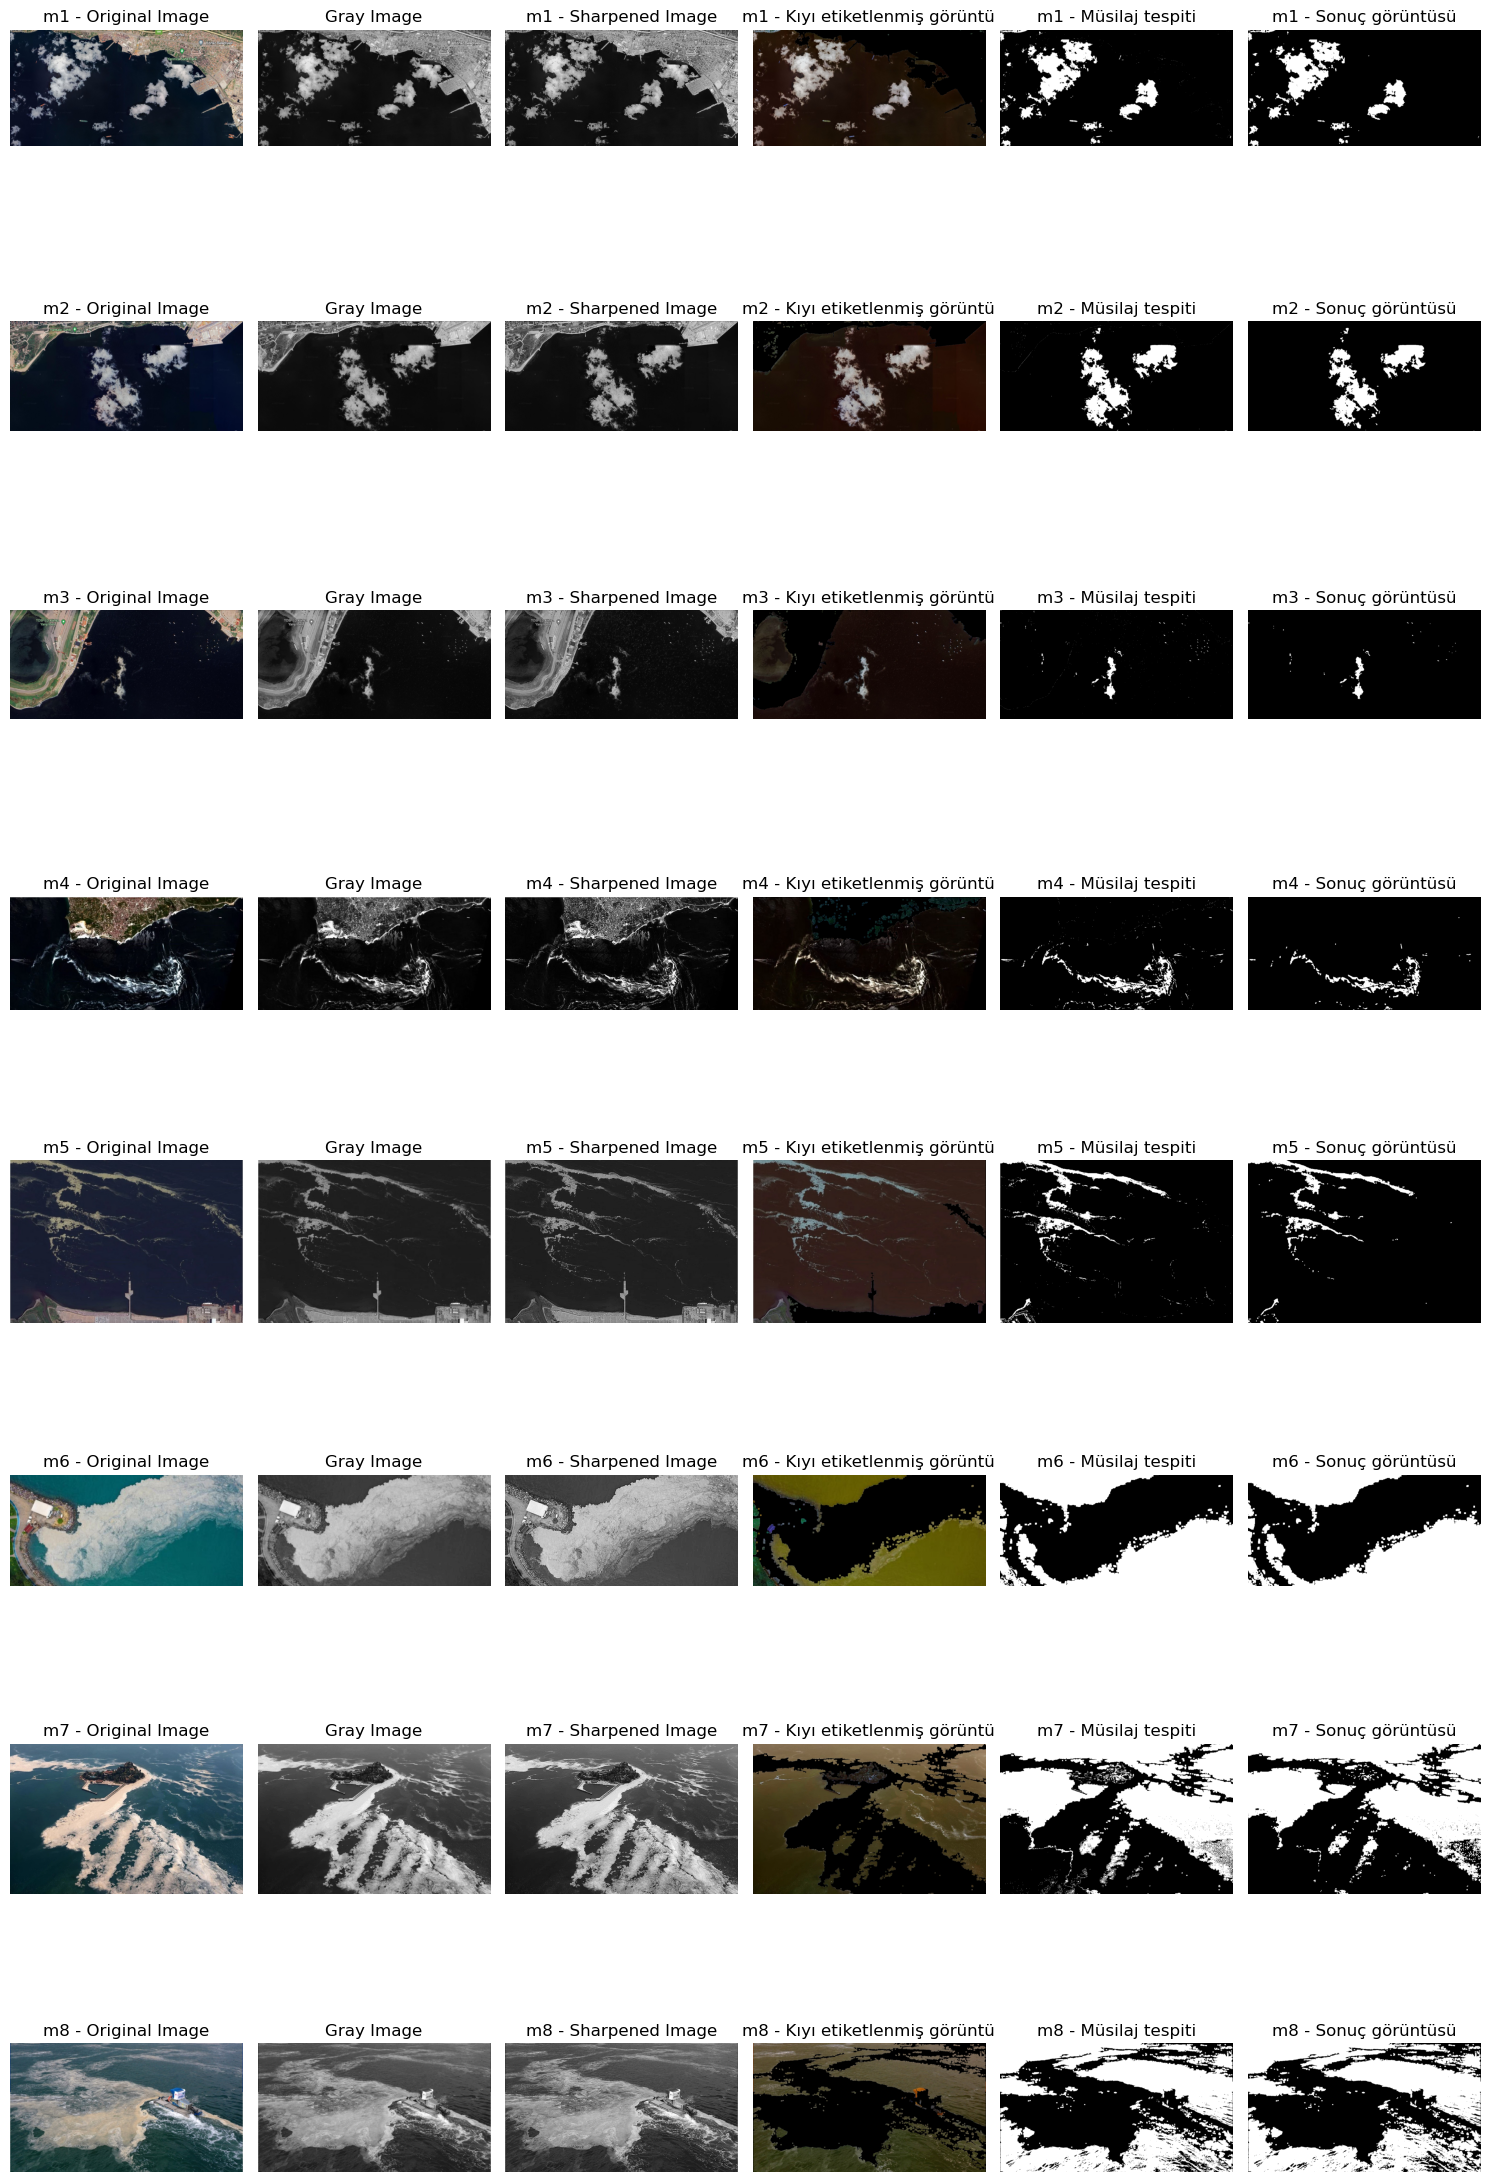

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def calculate_white_pixel_ratio(image):
    
    if len(image.shape) == 3:
        
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Beyaz piksellerin sayısını ve toplam piksel sayısını hesapla
    white_pixel_count = np.sum(gray_image == 255)
    total_pixel_count = gray_image.size

    # Beyaz piksel oranını hesapla
    white_pixel_ratio = (white_pixel_count / total_pixel_count) * 100

    
    print(f"Total Pixels: {total_pixel_count}")
    print(f"White Pixels: {white_pixel_count}")
    print(f"White Pixel Ratio: {white_pixel_ratio:.2f}%")

    return white_pixel_ratio

def process_image(image_path, ax, index):
    # Görüntüyü yükle
    image = cv2.imread(image_path)

    # Gri tonlamaya dönüştür
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # İlk subplot: Orijinal Görüntü
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f'{index} - Original Image')
    ax[0].axis('off')

    ax[1].imshow(gray_image, cmap='gray')
    ax[1].set_title('Gray Image')
    ax[1].axis('off')
    
    #Blur
    gray_image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray_image2, -1, kernel)
 
    
    ax[2].imshow(sharpened, cmap='gray')
    ax[2].set_title(f'{index} - Sharpened Image')
    ax[2].axis('off')

    # Thresholding (Otsu yöntemi kullanılabilir)
    _, binary_image = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((5, 5), np.uint8)
    morphological_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    # Connected Components analizi uygula
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(morphological_image, connectivity=4)

    # En büyük bileşeni seç
    largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1
    largest_component_mask = (labels == largest_component_label).astype(np.uint8) * 255

    # Kıyıyı siyah renkte göster
    coast_color = (0, 0, 0)  # BGR formatında renk (örneğin, siyah)
    coast_image = image.copy()
    coast_image[largest_component_mask == 255] = coast_color

    ax[3].imshow(coast_image)
    ax[3].set_title(f'{index} - Kıyı etiketlenmiş görüntü')
    ax[3].axis('off')

    coast_img2 = cv2.cvtColor(coast_image, cv2.COLOR_BGR2GRAY)

    # Otsu yöntemi ile eşikleme
    _, otsu_thresholded_label = cv2.threshold(coast_img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((3, 3), np.uint8)
    result_image = cv2.morphologyEx(otsu_thresholded_label, cv2.MORPH_OPEN, kernel)

    ax[4].imshow(otsu_thresholded_label, cmap='gray')
    ax[4].set_title(f'{index} - Müsilaj tespiti')
    ax[4].axis('off')

    ax[5].imshow(result_image, cmap='gray')
    ax[5].set_title(f'{index} - Sonuç görüntüsü')
    ax[5].axis('off')

    white_pixel_ratio = calculate_white_pixel_ratio(result_image)

    # Sonuçları ekrana bas
    print(f"{index} - Image: {image_path}, White Pixel Ratio: {white_pixel_ratio:.2f}%")

# Görüntüleri işle
image_paths = ["m1.jpg", "m2.jpg", "m3.jpg", "m4.jpg", "m5.jpg", "m6.jpg", "m7.jpg", "m8.jpg"]
fig, axs = plt.subplots(len(image_paths), 6, figsize=(15, 3 * len(image_paths)))

for i, path in enumerate(image_paths):
    process_image(path, axs[i], f'm{i+1}')

plt.tight_layout()
plt.show()
